In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
%matplotlib inline
plt.style.use('ggplot')#更改绘图风格，R语言绘图库的风格
plt.rcParams['font.sans-serif']=['SimHei']

In [7]:
#数据导入
columns=['user_id','order_dt','order_numbers','order_amount']
df=pd.read_table('../原始文件/User_behavior.txt',names=columns,sep='\s+')#原始文件没有列名，利用names参数加上，不同列间的空格数量不等
df.head(10)#默认前五条

,user_id,order_dt,order_numbers,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [8]:
'''
由上面十行数据可知:
1、order_dt格式需要转换
2、存在一个用户一天购买多次的情况
'''
df.describe()

,user_id,order_dt,order_numbers,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [9]:
'''
由上述结果可知：
1、用户平均每笔订单的购买2.4个商品，标准差为2.3，有些许的波动，属于正常，然而在75%分位数时，为3个商品，说明大多数的订单都购买量不多，大约
   维持在2-3个左右，最大值为99，可知还是由用户一次会购买大量产品
2、大部分订单的金额维持在中小额
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_numbers  69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [30]:
#数据预处理
df['order_date']=pd.to_datetime(df['order_dt'],format='%Y%m%d')#用指定的格式转换数据列
df['month']=df['order_date'].values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_numbers,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


# 一、用户整体消费分析：

'\n图一：前三个月销量非常高，后面销量较为稳定，有下降的趋势\n图二：前三个月销售金额较高，与消费金额成正比例关系，后面下降严重\n      原因分析：\n      也有可能官方举办各种活动进行商品促销\n图三：前三个月订单数在10000左右，和后面大多数月份在2500左右\n图四：前三个月每月消费人数在8000-10000左右，后几个月不到2000人\n'

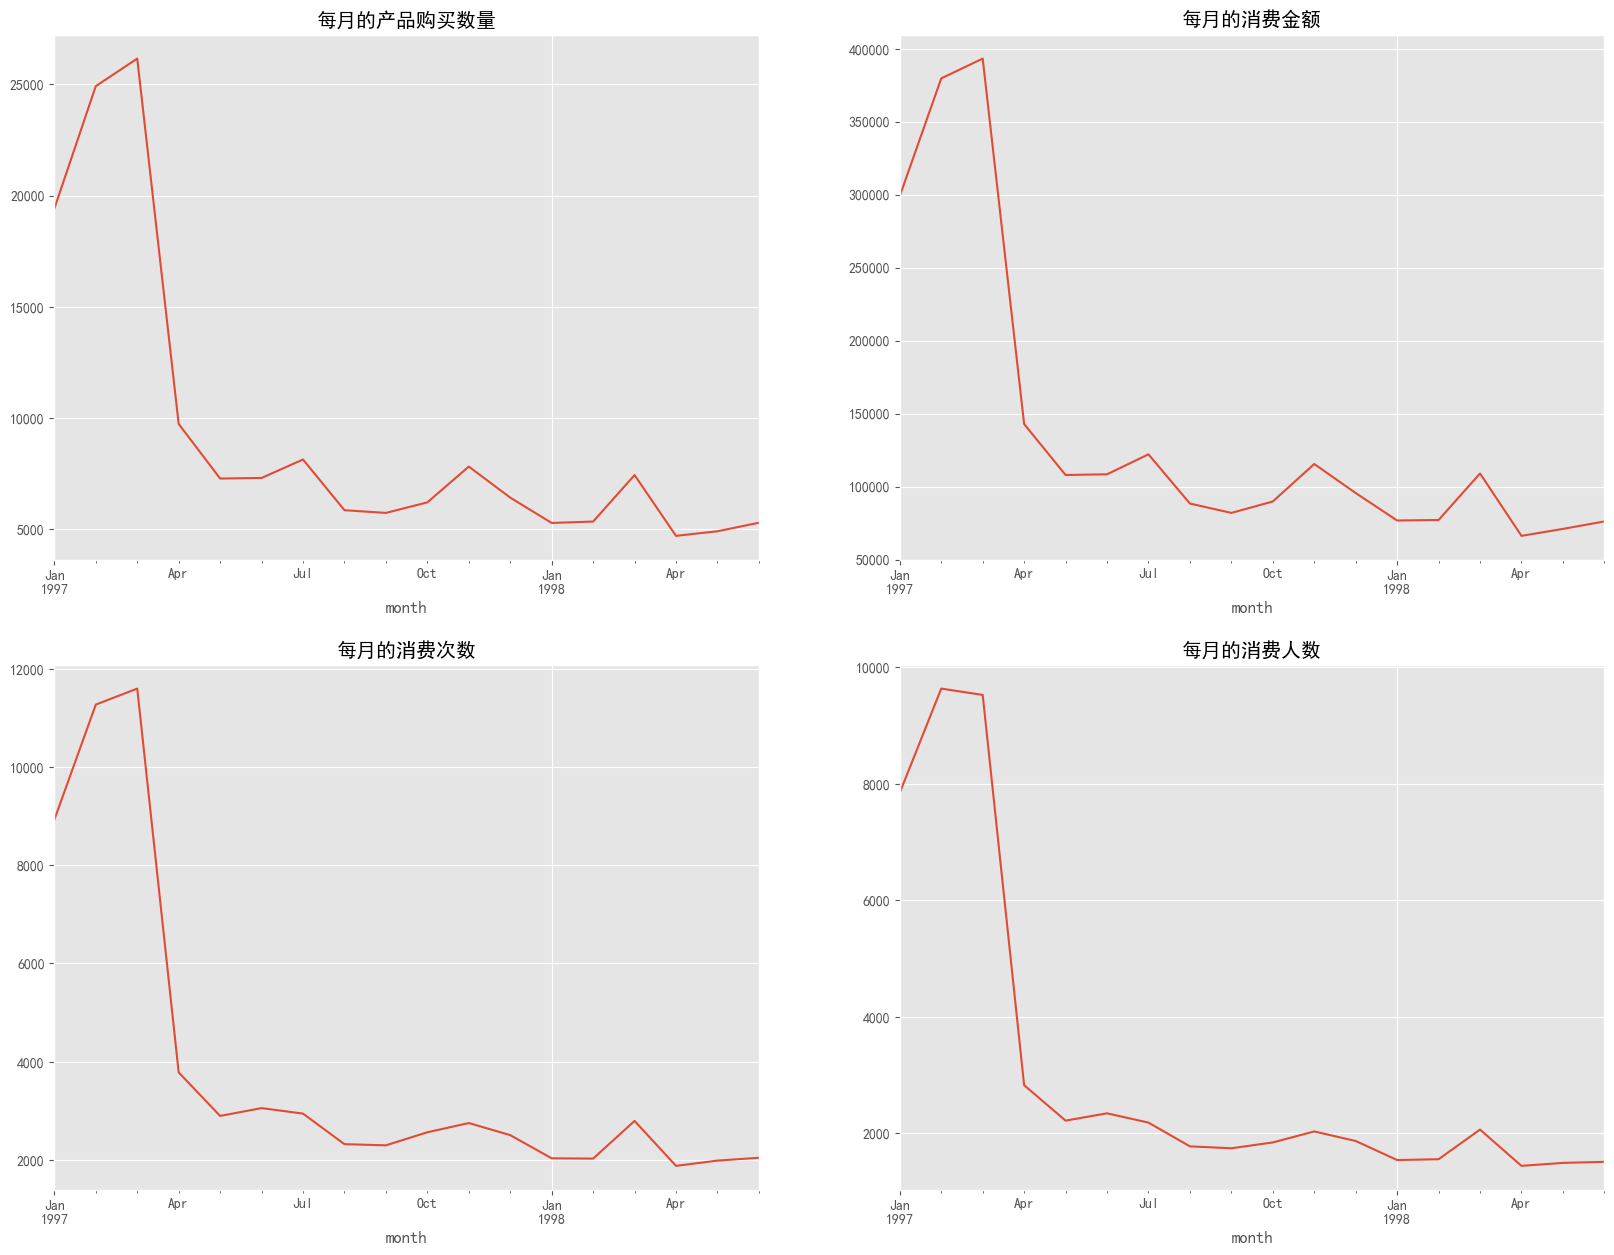

In [32]:
#按月份统计产品消费数量、消费金额、消费次数、消费人数
plt.figure(figsize=(20,15))#'画板'大小宽20英寸，高15英寸，1英寸约2.5cm
#每月的产品购买数量
plt.subplot(221)#4子图的第一个
df.groupby(by='month')['order_numbers'].sum().plot()#默认折线图
plt.title('每月的产品购买数量')
#每月的消费金额
plt.subplot(222)
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('每月的消费金额')
#每月的消费次数
plt.subplot(223)
df.groupby(by='month')['order_amount'].count().plot()
plt.title('每月的消费次数')
#每月的消费人数
plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()
plt.title('每月的消费人数')


`图一：前三个月销量非常高，后面销量较为稳定，有下降的趋势`  

`图二：前三个月销售金额较高，与消费金额成正比例关系，后面下降严重`  

`图三：前三个月订单数在10000左右，和后面大多数月份在2500左右`  

`图四：前三个月每月消费人数在8000-10000左右，后几个月不到2000人`  


# 二、用户个体消费分析

## 1.用户消费金额，消费次数（产品数量）

In [43]:
user_grouped=df.groupby(by='user_id')[['order_numbers','order_amount']].sum()
print(user_grouped)
print(user_grouped.describe())
print('用户数量：',len(user_grouped))


         order_numbers  order_amount
user_id                             
1                    1         11.77
2                    6         89.00
3                   16        156.46
4                    7        100.50
5                   29        385.61
...                ...           ...
23566                2         36.00
23567                1         20.97
23568                6        121.70
23569                2         25.74
23570                5         94.08

[23570 rows x 2 columns]
       order_numbers  order_amount
count   23570.000000  23570.000000
mean        7.122656    106.080426
std        16.983531    240.925195
min         1.000000      0.000000
25%         1.000000     19.970000
50%         3.000000     43.395000
75%         7.000000    106.475000
max      1033.000000  13990.930000
用户数量： 23570


`从用户购买商品数量角度：` 用户数量共有23570个，每个用户平均购买7件商品，中位数却只有3，最大购买量为1033，  
                 平均值大于中位数，属于右偏分布  
`从用户消费金额角度：`平均用户消费106元，中位数为43元，并且存在土豪用户消费13990元，平均数和中位数基本相等，  
              属于典型的右偏分布，说明存在小部分用户（后面25%）存在高额消费

Text(0.5, 1.0, '总购买量与总消费金额的散点图')

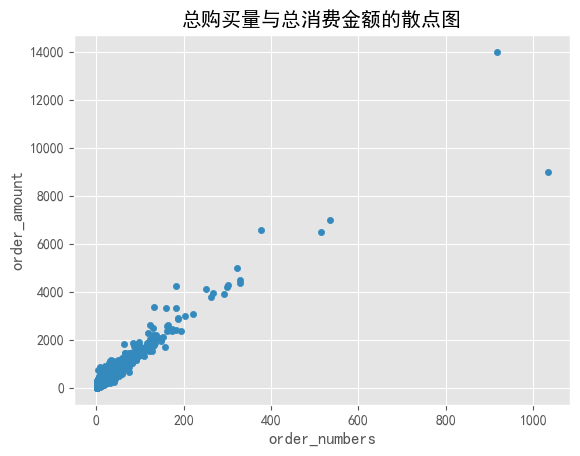

In [53]:
#绘制每个用户产品的总购买量与总消费金额的散点图
user_grouped.plot(kind='scatter',x='order_numbers',y='order_amount')
plt.title('总购买量与总消费金额的散点图')

用户的消费金额与用户的购买量呈现线性趋势，每个商品的均价在15元（算趋势线的斜率）左右  
订单的极值点（order_numbers>400 or order_amount>5000）比较少，不会对于整体的数据有太大的影响,可以忽略不计

##  2、用户订单消费金额分布：

Text(0.5, 1.0, '每个用户的购买商品数量直方图')

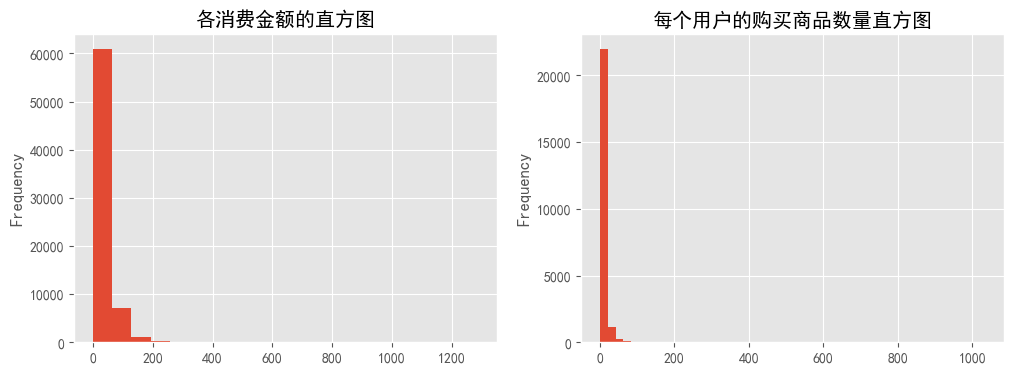

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('每个订单的消费金额')
df['order_amount'].plot(kind='hist',bins=20)#bins：区间份数，影响柱子的宽度
plt.title('各消费金额的直方图')
plt.subplot(122)
plt.xlabel('每个用户的购买商品数量')
df.groupby(by='user_id')['order_numbers'].sum().plot(kind='hist',bins=50)
plt.title('每个用户的购买商品数量直方图')

消费金额在100以内的订单数占据了绝大多数，消费金额在100-200区间占少部分，而>200的占极少一部分  
从第二幅图可知，我们的用户购买商品数量主要集中在50以内
由两幅图可知，我们的用户大部分消费金额低，购买的商品数量少（这在电商行业属于正常现象）

## 3.用户累计消费金额占比（用户贡献度）

In [66]:
#先进行用户分组，取出消费金额，进行求和排序，重置索引
user_grouped2=df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_grouped2

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [69]:
#再进行每个用户的消费金额的累加：
user_grouped2['amount_cumsum']=user_grouped2['order_amount'].cumsum()#每一行得到前面所有行的累加和
user_grouped2.tail()#默认后五行

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [72]:
#消费总额：
user_grouped2['amount_sum']=df['order_amount'].sum()
user_grouped2

,user_id,order_amount,amount_cumsum,amount_sum
0,10175,0.00,0.00,2500315.63
1,4559,0.00,0.00,2500315.63
2,1948,0.00,0.00,2500315.63
3,925,0.00,0.00,2500315.63
4,10798,0.00,0.00,2500315.63
...,...,...,...,...
23565,7931,6497.18,2463822.60,2500315.63
23566,19339,6552.70,2470375.30,2500315.63
23567,7983,6973.07,2477348.37,2500315.63
23568,14048,8976.33,2486324.70,2500315.63


In [77]:
#计算每个用户的贡献率
user_grouped2['prop']=user_grouped2.apply(lambda x:x['amount_cumsum']/x['amount_sum'],axis=1)#计算每个用户的贡献率
user_grouped2

,user_id,order_amount,amount_cumsum,amount_sum,prop
0,10175,0.00,0.00,2500315.63,0.000000
1,4559,0.00,0.00,2500315.63,0.000000
2,1948,0.00,0.00,2500315.63,0.000000
3,925,0.00,0.00,2500315.63,0.000000
4,10798,0.00,0.00,2500315.63,0.000000
...,...,...,...,...,...
23565,7931,6497.18,2463822.60,2500315.63,0.985405
23566,19339,6552.70,2470375.30,2500315.63,0.988025
23567,7983,6973.07,2477348.37,2500315.63,0.990814
23568,14048,8976.33,2486324.70,2500315.63,0.994404


Text(0.5, 1.0, '用户累计占比情况折线图')

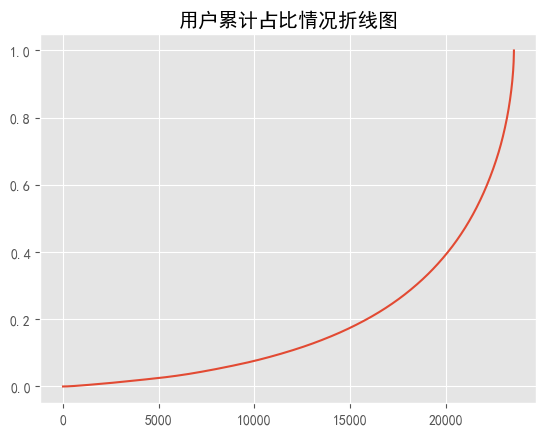

In [81]:
user_grouped2['prop'].plot()
plt.title('用户累计占比情况折线图')

由图分析可知：前20000名用户贡献总金额的40%，后3500名用户贡献总金额的60%，较为符合帕累托原则。

# 三、用户消费行为分析

## 1、首次购买时间

<Axes: xlabel='order_date'>

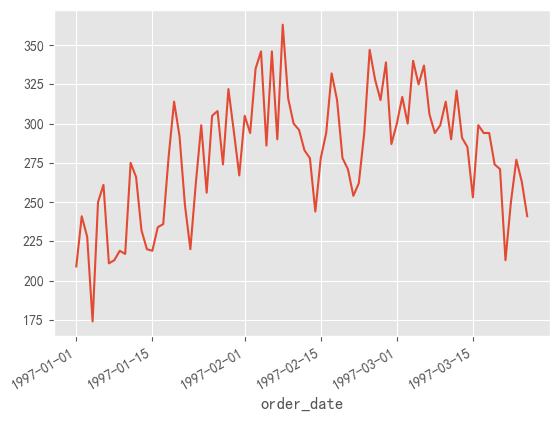

In [85]:
#用户分组，取最小值，每个首购时间有多少用户数量
df.groupby(by='user_id')['order_date'].min().value_counts().plot()#对order_date列值进行count()，并且进行绘图
plt.title('用户首购时间')

由图可知,首次购买的用户量在1月1日-2月7日呈明显的上升趋势，后续开始逐步下降，猜测可能是公司开始进行了引流活动。

## 2、最后一次购买时间

<Axes: xlabel='order_date'>

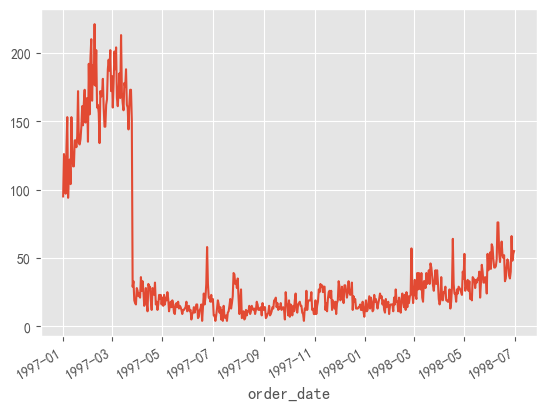

In [88]:
df.groupby(by='user_id')['order_date'].max().value_counts().plot()
plt.title('用户的最后一次购买时间用户数量')

大多数用户最后一次购买时间集中在前三个月，也就是1月到3月，说明缺少忠诚客户。5月之后，用户最后购买时间呈现略微上升趋势。

## 3、用户分层

### 构建RFM模型：

In [176]:
#透视表的使用：分组聚合
rfm =df.pivot_table(index='user_id',#类似groupby
                   values=['order_numbers','order_amount','order_date'],#取的数据列
                    aggfunc={
                        'order_date':'max',#每个用户最后一次购买，前面是列名，后面是聚合函数
                        'order_numbers':'sum',#每个用户商品的购买数量
                        'order_amount':'mean'#每个用户的总购买金额/消费次数
                    })
rfm

,order_amount,order_date,order_numbers
user_id,,,
1,11.770000,1997-01-01,1
2,44.500000,1997-01-12,6
3,26.076667,1998-05-28,16
4,25.125000,1997-12-12,7
5,35.055455,1998-01-03,29
...,...,...,...
23566,36.000000,1997-03-25,2
23567,20.970000,1997-03-25,1
23568,40.566667,1997-04-22,6


In [177]:
rfm['R']=(rfm['order_date'].max()-rfm['order_date']).map(lambda x:x.days)#本数据取所有用户中最晚时间为今天时间
rfm.rename(columns={'order_numbers':'F','order_amount':'M'},inplace=True)
rfm


,M,order_date,F,R
user_id,,,,
1,11.770000,1997-01-01,1,545
2,44.500000,1997-01-12,6,534
3,26.076667,1998-05-28,16,33
4,25.125000,1997-12-12,7,200
5,35.055455,1998-01-03,29,178
...,...,...,...,...
23566,36.000000,1997-03-25,2,462
23567,20.970000,1997-03-25,1,462
23568,40.566667,1997-04-22,6,434


In [178]:
#RFM的计算方式：每一列数据减去所在列的平均值，有正有负，结果值与1作比较，>=1设置为1，否则为0
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=1 else '0')
    label=level[0]+level[1]+level[2]
    d={
        '111':'重要价值用户',
        '011':'重要保持用户',
        '101':'重要发展用户',
        '001':'重要挽留用户',
        '110':'一般价值用户',
        '010':'一般保持用户',
        '100':'一般发展用户',
        '000':'一般挽留用户'
    }
    result=d[label]
    return result
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)#axis为1取横向数据
rfm

,M,order_date,F,R,label
user_id,,,,,
1,11.770000,1997-01-01,1,545,一般发展用户
2,44.500000,1997-01-12,6,534,重要发展用户
3,26.076667,1998-05-28,16,33,一般保持用户
4,25.125000,1997-12-12,7,200,一般挽留用户
5,35.055455,1998-01-03,29,178,重要保持用户
...,...,...,...,...,...
23566,36.000000,1997-03-25,2,462,重要发展用户
23567,20.970000,1997-03-25,1,462,一般发展用户
23568,40.566667,1997-04-22,6,434,重要发展用户


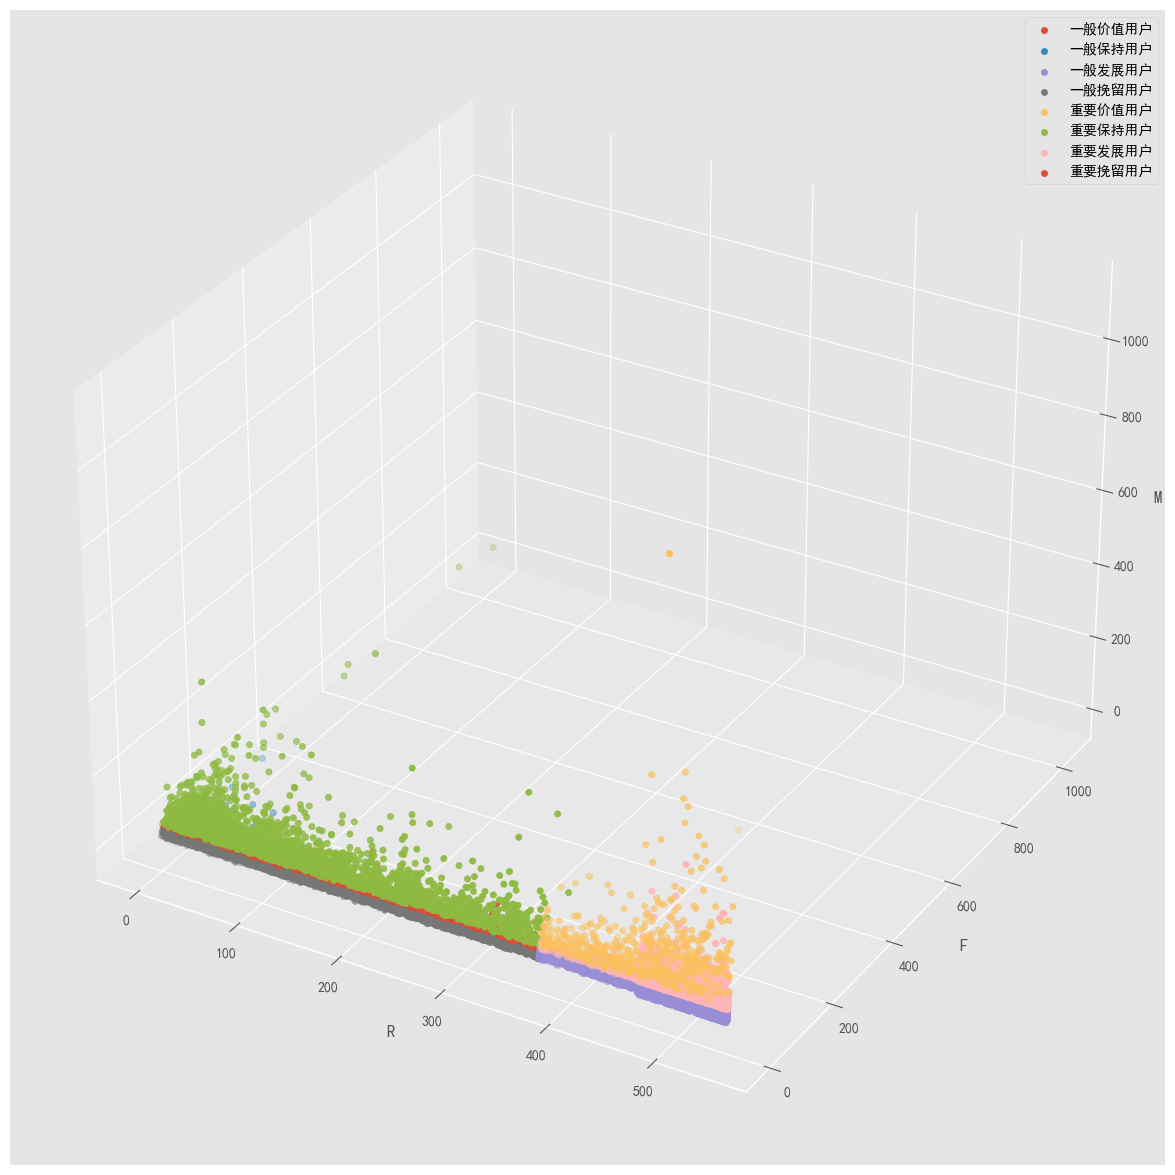

In [213]:

#客户分层可视化：
fig=plt.figure(figsize=(15,15))#画板
ax=fig.add_subplot(111,projection='3d')#轴，或者子图
for label,grouped in rfm.groupby(by='label'):
        #print(label,grouped)#可知groupby函数返回的两个对象
        x=grouped['R']
        y=grouped['F']
        z=grouped['M']
        ax.set_xlabel('R')
        ax.set_ylabel('F')
        ax.set_zlabel('M')
        ax.scatter(x,y,z,label=label)
        ax.legend()#图例


由图可知，我们的用户群体主要是重要保持用户

## 4、新用户，老用户，活跃用户，回流用户分析  
- 新用户：第一次消费
- 活跃用户：也是老用户，在某一个时间窗口内有过消费
- 不活跃用户：在某一个时间窗口内没有消费的老客户
- 回流用户：分为自主回流和人工回流，自主回流即是玩家自己回来消费，人工回流是指通过某些活动回来消费

In [221]:
pivoted_counts=df.pivot_table(
                            index='user_id',
                            columns='month',#也类似分组类sql中的group by 
                            values='order_dt',
                            aggfunc='count'#操作的是values中的值
).fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
df_purchase=pivot_counts.applymap(lambda x:1 if x>=1 else 0)
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [243]:
#对于前十八个月的状态进行判断：
def State_judgment(data):
    status=[]
    for i in range(18):
        if data[i]==0:#本月为0
            if len(status)==0:#看是否为第一次记录
                status.append('never_consume')
            else:               
                if status[i-1]=='never_consume':
                    status.append('never_consume')
                else:
                    status.append('unactive')
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='never_consume':
                    status.append('new')
                else:#上个月为1，new,active,return
                    status.append('active')
    return pd.Series(status,df_purchase.columns)
purchase_states=df_purchase.apply(State_judgment,axis=1)
purchase_states

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,never_consume,never_consume,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,never_consume,never_consume,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,never_consume,never_consume,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [250]:
purchase_states_grouped=purchase_states.apply(lambda x:pd.value_counts(x))#对于值的计数
purchase_states_grouped

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681.0,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
never_consume,15724.0,7248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new,7846.0,8476.0,7248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595.0,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046.0,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<Axes: xlabel='month'>

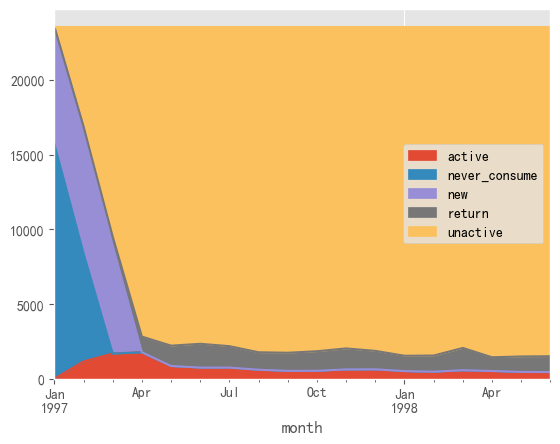

In [254]:
purchase_states_grouped.T.fillna(0).plot.area()#为便于绘图进行空值的替换,转置将x轴进行月份的可视化

在前三个月，活跃用户和和新用户占比较高，当然也有未付费用户，前几个月未付费用户占比较高属于正常情况，四月份过后，新用户和活跃用户趋于稳定，回流用户主要在四月份过后呈稳定趋势，是我们需要进行维护的重要用户

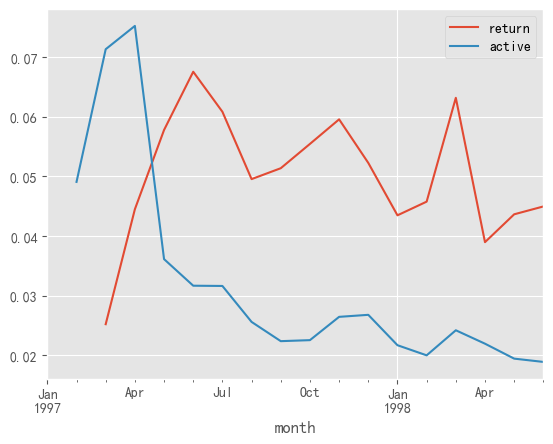

In [260]:
rate=purchase_states_grouped.T.apply(lambda x:x/x.sum(),axis=1)#计算各个用户的占比情况
rate['return'].plot(label='return')
rate['active'].plot(label='active')
plt.legend()


回流用户：三月到六月期间回流用户的占比较高，过后呈现下降趋势
活跃用户：前三个月活跃用户比例大量增长，结合面积图中大量用户处于未付费阶段，可能是活动引流导致活跃用户增多
大约四月份之后，活跃用户比例要远大于回流用户

## 5、用户购买周期分析

In [279]:
#用户相邻两次购买的差值
order_diff=df.groupby(by='user_id')['order_date'].apply(lambda x: x-x.shift())
order_diff

user_id       
1        0           NaT
2        1           NaT
         2        0 days
3        3           NaT
         4       87 days
                   ...  
23568    69654   11 days
         69655   17 days
23569    69656       NaT
23570    69657       NaT
         69658    1 days
Name: order_date, Length: 69659, dtype: timedelta64[ns]

In [280]:
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

Text(0.5, 1.0, '用户消费周期分布直方图')

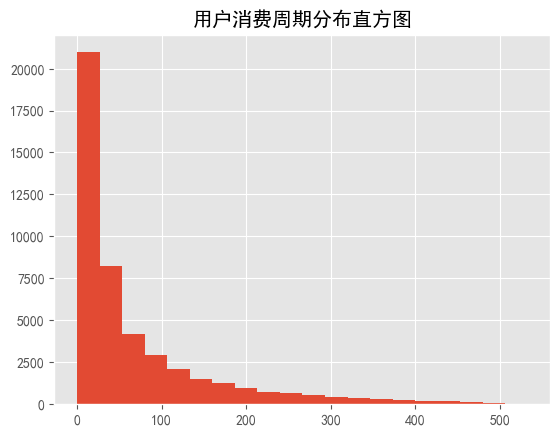

In [281]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)#将日期型转换为flaot型进行可视化，timedelta不支持可视化
plt.title('用户消费周期分布直方图')

平均消费周期是68天，大多数用户的消费周期<100天呈现典型的长尾分布  
小部分用户消费周期在200天以上，可以在其消费后三天以内进行回访或者赠送优惠券等活动减少其购买周期。

## 6、用户生命周期：

In [288]:
#计算方式：用户最后一次购买日期-用户第一次购买的日期
user_life=df.groupby(by='user_id')['order_date'].agg(['min','max'])
user_life

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-03-25,1997-04-22


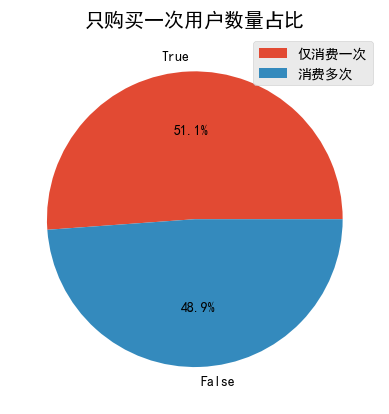

In [297]:
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%',label='')#只购买一次的条件
plt.title('只购买一次用户数量占比')
plt.legend(['仅消费一次','消费多次'])

一半以上的用户只消费过一次，说明我们的用户留存率不好，运营方面存在较大问题

In [299]:
(user_life['max']-user_life['min']).describe()#生命周期

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

用户的平均生命周期为134天，但是中位数为0，再次印证了大多数用户只消费了一次，很多低质量用户，  
75%分位数以后的用户，生命周期>294天，属于核心用户，需要着重维持

Text(0, 0.5, '用户人数')

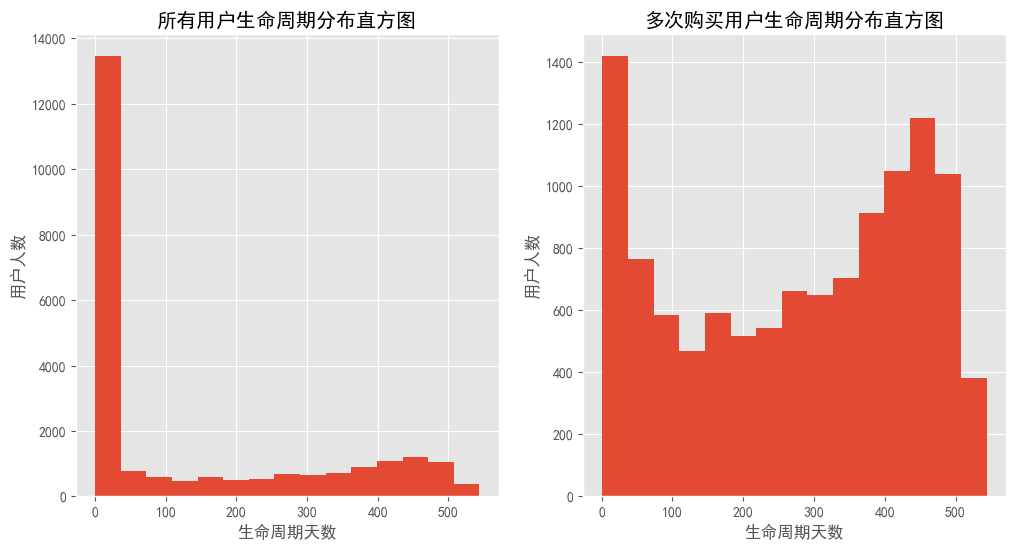

In [319]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期分布直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

plt.subplot(122)
all_user_life=(user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')#reset_index可以让前面的timedelta格式数据变成dataframe类型
part_user_life=all_user_life[all_user_life>0]#取多次购买商品的生命周期
part_user_life.hist(bins=15)
plt.title('多次购买用户生命周期分布直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

- 上述两幅图对比可知，在过滤掉生命周期为0天的用户，右图呈现了明显的双峰结构，左峰是生命周期趋近于0天的用户，属于普通用户，  
可进行针对性的营销活动  
- 右峰生命周期在350天到500天之间，属于我们的忠诚用户，需要重点维护

## 7、用户复购率和回购率分析

### 复购率分析：

Text(0.5, 1.0, '复购率变化情况')

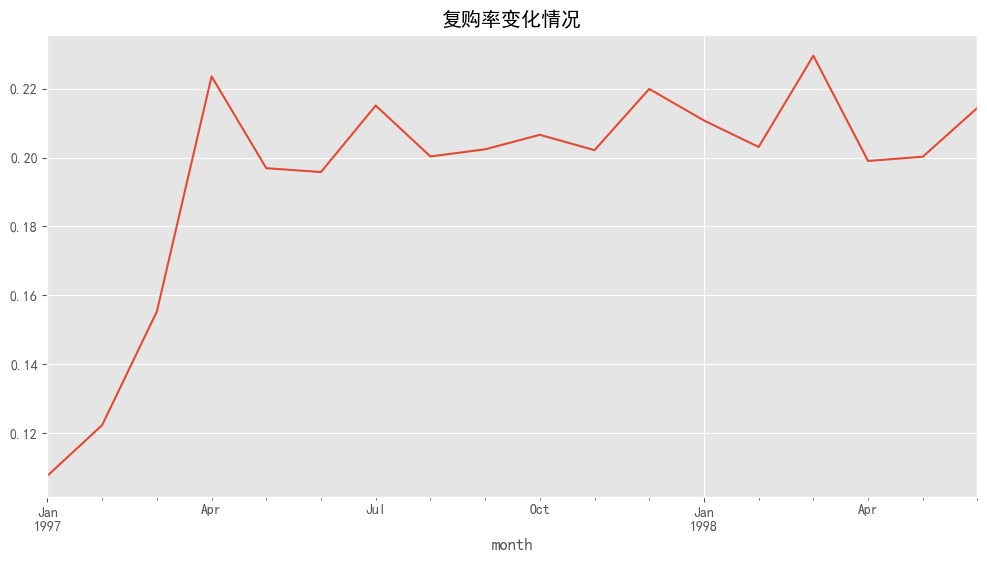

In [325]:
#在一个月内，购买多次的用户在总消费人数中的占比（消费记录数>2,消费总人数，未消费数）
repeat_purchase=pivoted_counts.applymap(lambda x:1 if x>1 else 0 if x==1 else np.NaN)#消费次数>1计为1，购买一次用户计为0，没有购买的用户计为nan
(repeat_purchase.sum()/repeat_purchase.count()).plot(figsize=(12,6))
plt.title('复购率变化情况')

由上图可知，前三个月复购率开始提升，后续平稳维持在20%-22%之间，一开始复购率低可能是大批新用户仅仅只购买一次造成的

### 回购率分析：

In [329]:
#在一个窗口内进行了消费，在下一个窗口内又进行了消费，这里设定一个窗口为一个月
def purchase_back(data):
    status=[]
    for i in range(17):
        if data[i]==1:#当前月进行了消费
            if data[i+1]==1:
                status.append(1)#复购用户
            else:
                status.append(0)#非复购用户
        else:#当前月未进行消费
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,df_purchase.columns)
purchase_back=df_purchase.apply(purchase_back,axis=1)
purchase_back

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


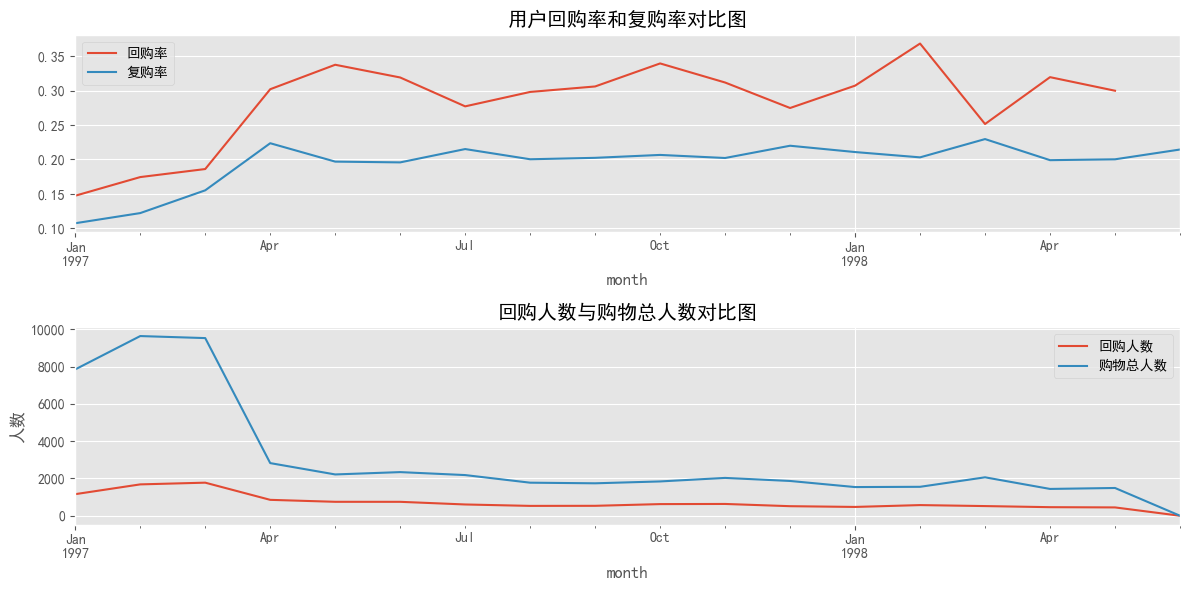

In [344]:
purchase_back_rate=purchase_back.sum()/purchase_back.count()
plt.figure(figsize=(20,10))
plt.subplot(211)
purchase_back_rate.plot()
(repeat_purchase.sum()/repeat_purchase.count()).plot(figsize=(12,6))
plt.legend(['回购率','复购率'])
plt.title('用户回购率和复购率对比图')

plt.subplot(212)
(purchase_back.sum()).plot(label='回购人数')
(purchase_back.count()).plot(label='购物总人数')
plt.ylabel('人数')
plt.title('回购人数与购物总人数对比图')
plt.legend()
plt.tight_layout()


In [ ]:
- 回购率可知，平稳过后在30%左右，波动相对较大  
- 复购率总体都低于回购率，且复购率平稳后在20%左右，波动相对较小
- 前三个月不论复购还是回购率，都呈现上升趋势，说明新用户需要一定的时间来变成复购用户或者回购用户